In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x, y), (test_X, test_y) = mnist.load_data()
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size=0.16666666666666666667, random_state=42, stratify=y)

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_val: ' + str(val_X.shape))
print('Y_val: ' + str(val_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (50000, 28, 28)
Y_train: (50000,)
X_val: (10000, 28, 28)
Y_val: (10000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


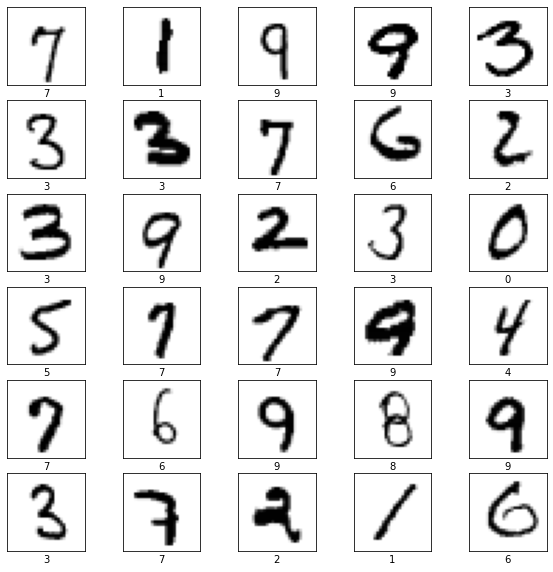

In [3]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train_X[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(train_y[i])

([<matplotlib.axis.XTick at 0x7fd6efe2f100>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

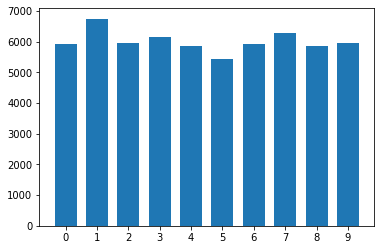

In [4]:
bin_edges = np.arange(-0.5, 9.5+1, 1)
plt.hist(y, bins=bin_edges ,rwidth = 0.7)
plt.xticks(np.arange(0, 9+1, 1))

([<matplotlib.axis.XTick at 0x7fd6ee558970>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

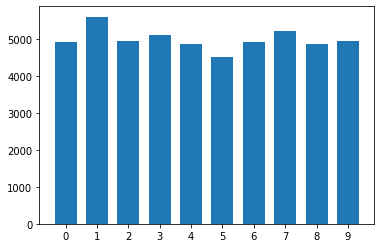

In [5]:
bin_edges = np.arange(-0.5, 9.5+1, 1)
plt.hist(train_y, bins=bin_edges ,rwidth = 0.7)
plt.xticks(np.arange(0, 9+1, 1))

([<matplotlib.axis.XTick at 0x7fd6ee4e9280>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

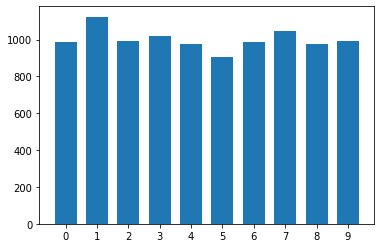

In [6]:
bin_edges = np.arange(-0.5, 9.5+1, 1)
plt.hist(val_y, bins=bin_edges ,rwidth = 0.7)
plt.xticks(np.arange(0, 9+1, 1))

In [7]:
uniques = np.unique(train_y, return_counts=True, return_index=True)

In [8]:
uniques

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([14,  1,  9,  4, 19, 15,  8,  0, 23,  2]),
 array([4936, 5618, 4965, 5109, 4868, 4518, 4932, 5221, 4876, 4957]))

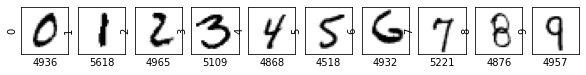

In [9]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train_X[uniques[1][i], :]).reshape(28,28), cmap=plt.cm.binary)
    plt.ylabel(uniques[0][i])
    plt.xlabel(uniques[2][i])

In [10]:
pixel_values = {}
for i in range(10):
    pixel_values[i] = []

In [11]:
for i in range(len(train_X)):
    number = train_y[i]
    pixels = train_X[i]
    pixel_values[number].append(pixels)

In [12]:
mean_pixel_values = {}
for i in range(10):
    mean_pixel_values[i] = np.mean(pixel_values[i], axis=0)

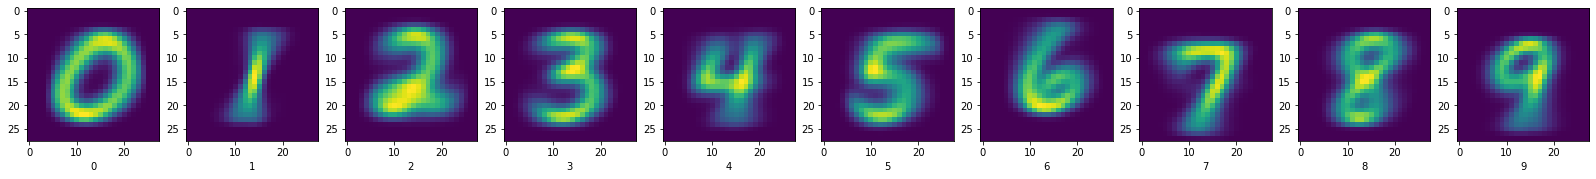

In [13]:
plt.figure(figsize=(28, 28))

for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(mean_pixel_values[i].reshape(28,28))
    plt.xlabel(i)

In [14]:
mean_pixel_values = {}
std_pixel_values = {}
outliers = {}

for i in range(10):
    mean_pixel_values[i] = np.mean(pixel_values[i], axis=0)
    std_pixel_values[i] = np.std(pixel_values[i], axis=0)
    threshold = mean_pixel_values[i] + 3 * std_pixel_values[i] # mean + std
    outliers[i] = np.max(np.where(pixel_values[i] > threshold, pixel_values[i], 0), axis=0)

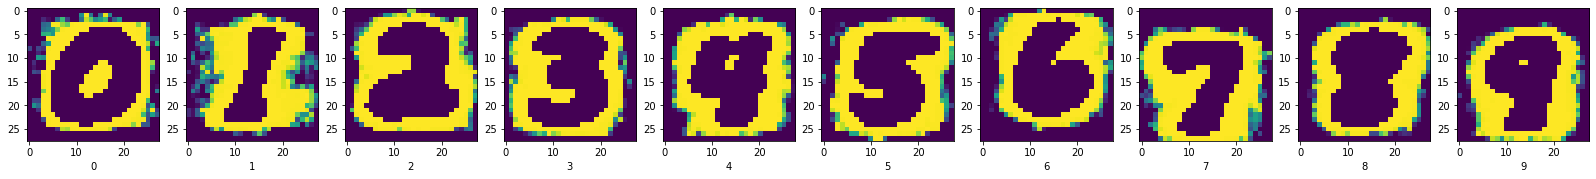

In [15]:
plt.figure(figsize=(28, 28))

for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(outliers[i])
    plt.xlabel(i)